## Machine Learning Pipeline for Income Prediction

This script implements a machine learning pipeline to predict income levels based on various features.

The pipeline includes data preprocessing, feature transformation, model training, and evaluation.

In [1]:
import sys
sys.path.append('../utils')
from helpers import (load_data, drop_transform_data,
                     show_stats, model_pipeline)

In [2]:
 # Load data
train_df = load_data('../data/train.csv')

Loaded data with shape: (7194, 14)


In [3]:
# drop and transform columns
train_df = drop_transform_data(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7194 entries, 0 to 7193
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INCOME          7194 non-null   float64
 1   SEX             7194 non-null   object 
 2   MARITAL.STATUS  7066 non-null   object 
 3   AGE             7194 non-null   float64
 4   EDUCATION       5489 non-null   float64
 5   OCCUPATION      7087 non-null   object 
 6   DUAL.INCOMES    2845 non-null   float64
 7   HOUSEHOLD.SIZE  6891 non-null   float64
 8   HOUSEHOLDER     6996 non-null   object 
 9   ETHNIC.CLASS    7140 non-null   object 
 10  LANGUAGE        6904 non-null   object 
dtypes: float64(5), object(6)
memory usage: 618.4+ KB
None


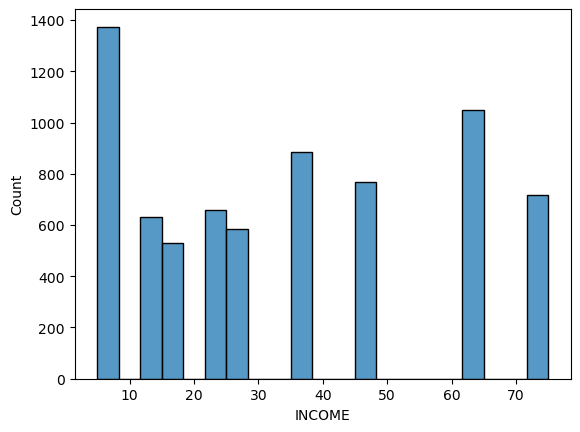

In [ ]:
# show stats and target
show_stats(train_df)

In [5]:
model_pipeline(train_df)

random_forest - Average MSE: 338.36
gradient_boosting - Average MSE: 287.29
Lasso - Average MSE: 333.34

Best model: gradient_boosting with MSE: 287.29
Model saved to ../models/best_regression_pipeline_model.pkl


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AGE',
                                                                          'EDUCATION',
                                                                          'DUAL.INCOMES',
                                                                          'HOUSEHOLD.SIZE']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['SEX',
                                                                          'LANGUAGE',
                                                                          'ETHNIC.CLASS',
                                                                          'HOUSEHOLDER',
                                                                          'MARITAL.STATUS',
                                                                          'OCCUPATION'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.1, 0.05],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')